

```
# This is formatted as code
```

# Population growth in the United States



In [3]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


canvas only allows ipynb file types, here is link to html project file on github https://github.com/slewis3418/slewis3418.github.io/blob/main/Yet_another_copy_of_milestone1%20(2).html



In [ ]:
!ls

drive  sample_data


In [ ]:

%%shell
jupyter nbconvert --to html /content/milestone1.ipynb

[NbConvertApp] WARNING | pattern '/content/milestone1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--exe

CalledProcessError: Command 'jupyter nbconvert --to html /content/milestone1.ipynb
' returned non-zero exit status 255.

For my project, I will focus on the population growth trends in the United States, and compare that to indicators of econmic health and growth, such as per capita income and total output. My main data set is [NCS data](https://www.census.gov/data/tables/time-series/demo/popest/2020s-national-total.html) from the census bureau website, which shows states population by year. Using this, I can compute growth from year to year, and compare them by both region and state. Aditionally, I can use [ACS data](https://data.census.gov/table/ACSDT1Y2023.B19301?q=b19301&g=010XX00US$0400000), which shows average household income by state, to break down how different states are doing econonically, and compare this to population growth.

In [4]:
import pandas as pd
df_NST = pd.read_csv("/content/drive/My Drive/NST-EST2024-ALLDATA.csv")
df_NST.head()
df_NST


,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023,...,RINTERNATIONALMIG2023,RINTERNATIONALMIG2024,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RDOMESTICMIG2024,RNETMIG2021,RNETMIG2022,RNETMIG2023,RNETMIG2024
0,10,0,0,0,United States,331515736,331577720,332099760,334017321,336806231,...,6.840246,8.231786,0.000000,0.000000,0.000000,0.000000,1.133093,5.084797,6.840246,8.231786
1,20,1,0,0,Northeast Region,57617706,57431458,57252533,57159597,57398303,...,8.175150,9.848371,-4.674375,-7.824957,-4.857718,-3.334322,-3.271477,-2.006798,3.317432,6.514050
2,30,1,1,0,New England,15122011,15057350,15118145,15175633,15263573,...,8.005202,9.622685,2.416795,-2.957175,-2.067991,-1.575091,4.188365,4.325839,5.937211,8.047594
3,30,1,2,0,Middle Atlantic,42495695,42374108,42134388,41983964,42134730,...,8.236647,9.930153,-7.206423,-9.578005,-5.867209,-3.971810,-5.935167,-4.287388,2.369438,5.958342
4,20,2,0,0,Midwest Region,68998970,68984258,68872831,68903297,69186401,...,4.859117,5.861482,-2.502867,-2.649762,-1.300416,-0.709222,-1.700819,0.891824,3.558701,5.152260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,40,4,9,53,Washington,7707586,7727209,7743760,7794123,7857320,...,8.570200,10.316588,-2.028057,-0.444333,-2.209764,0.337770,-0.219379,5.160549,6.360436,10.654358
62,40,3,5,54,West Virginia,1793736,1791646,1785618,1774122,1770495,...,1.309027,1.604870,1.668314,0.162371,1.859721,2.553330,2.074770,1.102328,3.168749,4.158200
63,40,2,3,55,Wisconsin,5894170,5897375,5881608,5903975,5930405,...,3.083727,3.724715,-3.158677,1.273081,1.298758,1.064973,-2.617204,4.614960,4.382486,4.789688
64,40,4,8,56,Wyoming,576844,577681,579636,581978,585067,...,1.777138,2.191552,3.126196,4.216547,2.983604,1.468425,3.362951,5.165227,4.760742,3.659977


In [14]:

percent_change = ((df_NST['POPESTIMATE2023'] - df_NST['POPESTIMATE2021'])/df_NST['POPESTIMATE2021'])*100
percent_change.describe()


,0
count,66.000000
mean,1.225981
std,1.295592
min,-1.805830
25%,0.348190
50%,0.949175
75%,2.175937
max,4.914444


In [15]:
southeast_states = [
    "Alabama", "Arkansas", "Florida", "Georgia", "Kentucky",
    "Louisiana", "Mississippi", "North Carolina", "South Carolina",
    "Tennessee", "Virginia", "West Virginia"
]
df_NST.loc[df_NST['NAME'].isin(southeast_states), 'POPESTIMATE2024'].mean()

7438506.833333333

In [16]:
pop_se_2023 = df_NST.loc[df_NST['NAME'].isin(southeast_states), 'POPESTIMATE2023']
pop_se_2023.describe()
pop_se_2021 = df_NST.loc[df_NST['NAME'].isin(southeast_states), 'POPESTIMATE2021']
pop_se_2021.describe()
pop_se_change = ((pop_se_2023 - pop_se_2021)/pop_se_2021)*100
pop_se_change.describe()

,0
count,12.000000
mean,1.627628
std,1.795388
min,-0.862149
25%,0.622088
50%,1.381680
75%,2.715520
max,4.914444


Above, I created an indicator of all the southeastern states in the United States. Then, after finding the mean I calculated the population change between the years of 2023 and 2021. From this, we can see that the population in the southeast is increasing slightly more than the population of the rest of the country between these two years. IN the south, the population increased by about 1.62%, where as it increased by about 1.22% across the whole country.

In [17]:
percent_change2 = ((df_NST['RINTERNATIONALMIG2023'] - df_NST['RINTERNATIONALMIG2024'])/df_NST['RINTERNATIONALMIG2023'])
percent_change2.describe()

,0
count,66.000000
mean,4.088176
std,34.896813
min,-0.354780
25%,-0.209164
50%,-0.204223
75%,-0.199020
max,283.295667


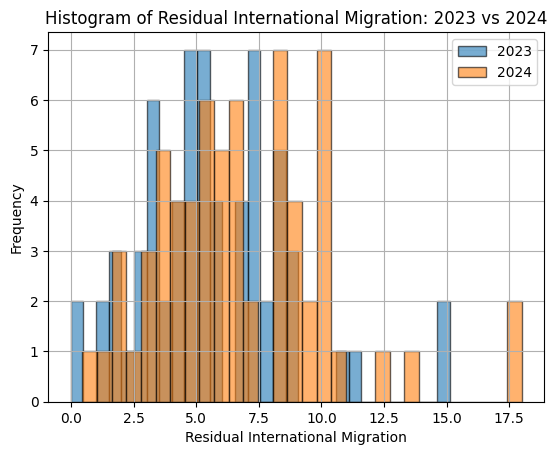

In [18]:
import matplotlib.pyplot as plt

plt.hist(df_NST['RINTERNATIONALMIG2023'], bins=30, alpha=0.6, label='2023', edgecolor='black')
plt.hist(df_NST['RINTERNATIONALMIG2024'], bins=30, alpha=0.6, label='2024', edgecolor='black')

plt.title('Histogram of Residual International Migration: 2023 vs 2024')
plt.xlabel('Residual International Migration')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

Above, we see a graph of residual international migration to the United States, for the years 2023 and 2024. Both are relativley similar, and sugest similar international migration patterns between both years, however 2024 has more variability, sugesting that perhaps there was a shift in imigration policy that might have favored immigrants in some states.

Using ACS data, we can see the average household income by state for the year 2023 and 2021.

In [19]:
northeast_df = df_NST[
    (df_NST['NAME'] == 'Connecticut') |
    (df_NST['NAME'] == 'Maine') |
    (df_NST['NAME'] == 'Massachusetts') |
    (df_NST['NAME'] == 'New Hampshire') |
    (df_NST['NAME'] == 'Rhode Island') |
    (df_NST['NAME'] == 'Vermont') |
    (df_NST['NAME'] == 'New Jersey') |
    (df_NST['NAME'] == 'New York') |
    (df_NST['NAME'] == 'Pennsylvania')
]
northeast_df

,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023,...,RINTERNATIONALMIG2023,RINTERNATIONALMIG2024,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RDOMESTICMIG2024,RNETMIG2021,RNETMIG2022,RNETMIG2023,RNETMIG2024
20,40,1,1,9,Connecticut,3607701,3579918,3606607,3617925,3643023,...,8.254570,9.897115,5.400663,-2.880740,-1.779933,-1.656169,7.130289,3.307896,6.474637,8.240946
33,40,1,1,23,Maine,1363196,1364571,1378931,1390922,1399646,...,3.065326,3.705265,13.133579,10.382500,6.878886,3.800107,13.871322,12.732806,9.944212,7.505371
35,40,1,1,25,Massachusetts,7033132,6994598,7000474,7022468,7066568,...,10.591214,12.704169,-2.102597,-7.821896,-5.191555,-3.869676,0.251803,2.574210,5.399660,8.834493
43,40,1,1,33,New Hampshire,1377546,1378756,1387677,1396678,1402199,...,2.486712,3.052044,6.165340,7.190893,3.194138,3.478192,7.280133,8.295638,5.680850,6.530235
44,40,1,2,34,New Jersey,9289014,9272794,9270541,9295227,9379642,...,11.560242,13.844130,-3.519108,-7.192700,-5.156448,-3.766215,-1.928995,0.661432,6.403793,10.077915
46,40,1,2,36,New York,20203772,20105171,19848276,19703747,19737367,...,8.643265,10.461458,-15.020381,-14.950891,-8.969980,-6.106208,-13.579955,-9.304151,-0.326715,4.355250
52,40,1,2,42,Pennsylvania,13002909,12996143,13015571,12984990,13017721,...,5.232916,6.292115,2.167024,-3.108010,-1.671364,-0.881345,2.951132,-0.189611,3.561552,5.410770
53,40,1,1,44,Rhode Island,1097354,1096530,1097246,1099498,1103429,...,7.128697,8.597591,0.324555,-4.577684,-2.978764,-0.275303,1.300042,3.020834,4.149933,8.322287
59,40,1,1,50,Vermont,643082,642977,647210,648142,648708,...,2.543085,3.120565,7.550843,1.690660,1.192119,-0.787850,8.194161,4.669001,3.735205,2.332715


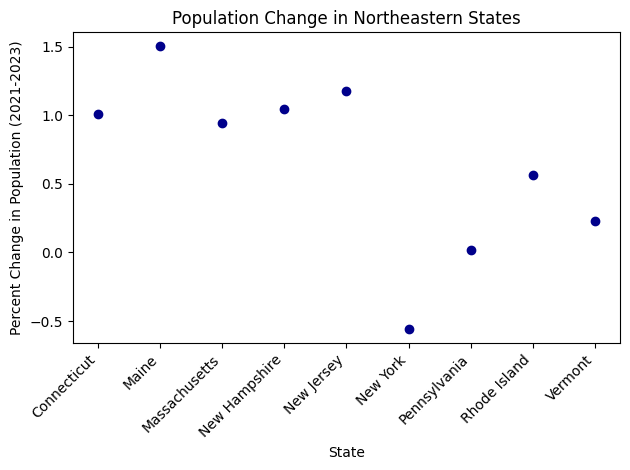

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(northeast_df['NAME'], northeast_df['percent_change'], color='darkblue')
plt.xlabel("State")
plt.ylabel("Percent Change in Population (2021-2023)")
plt.title("Population Change in Northeastern States")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Above, we can see the breakdown in percent change in population by state's in the northeast between 2021 and 2023. We can see that all states besides New York have a growing population, with Maine having the highest population growth rate.

In [13]:

acs2023 = pd.read_csv("/content/drive/My Drive/ACS2023.csv")
acs2023
acs2021 = pd.read_csv("/content/drive/My Drive/ACS2021.csv")
acs2021



,GEO_ID,NAME,B19013_001E,B19013_001M,Unnamed: 4
0,Geography,Geographic Area Name,Estimate!!Median household income in the past ...,Margin of Error!!Median household income in th...,NaN
1,0400000US01,Alabama,53913,781,NaN
2,0400000US02,Alaska,77845,2148,NaN
3,0400000US04,Arizona,69056,686,NaN
4,0400000US05,Arkansas,52528,1002,NaN
5,0400000US06,California,84907,542,NaN
6,0400000US08,Colorado,82254,791,NaN
7,0400000US09,Connecticut,83771,1112,NaN
8,0400000US10,Delaware,71091,1795,NaN
9,0400000US11,District of Columbia,90088,3477,NaN


Above, we can see the average income of every state in the year 2021 and 2023, below, we can see the percent growth of average household income in louisiana.

In [25]:
la_2021 = float(acs2021[acs2021['NAME'] == 'Louisiana'].iloc[0]['B19013_001E'])
la_2023 = float(acs2023[acs2023['NAME'] == 'Louisiana'].iloc[0]['B19013_001E'])
la_change = ((la_2023 - la_2021) / la_2021)
la_change

0.11791809856586097

We can see that louisianas household income increased by 11% between 2021 and 2023.